# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [13]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [14]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(6.2438)


## Sampling from categorical probabilities with given probabilities

In [15]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

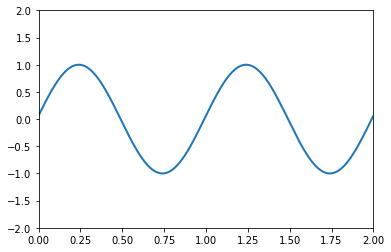

In [16]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

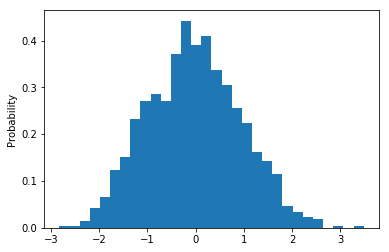

In [17]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

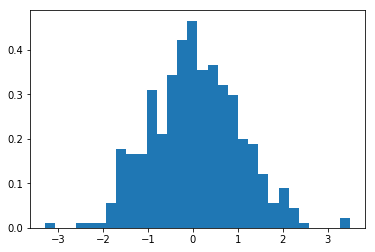

In [21]:
## Insert solution here
def animate():
    fig, ax = plt.subplots()
    stage = []
        
    def draw(i):
        x = np.random.normal(size = 2)
        stage.extend(x)
        ax.cla()
        a,b,p = ax.hist(stage, density=True, bins=30)
        return p
        
    def init():
        ax.cla()
        a,b,p = ax.hist([], density=True, bins=30)
        return p
        
    anim = animation.FuncAnimation(fig, draw, init_func=init, frames=200, interval=20, blit=True)
    
    return HTML(anim.to_jshtml())

animate()

## Task 2

In [19]:
## First solution - people sample rand with given probability
def isRealIllPerson():
    person = pyro.sample("bernoulli_sampling", pyro.distributions.Bernoulli(torch.tensor([0.002])))
    return person == 1

def test(isRealIll):
    if isRealIll:
        test = pyro.sample("bernoulli_sampling", pyro.distributions.Bernoulli(torch.tensor([0.99])))
        return test == 1
    else:
        test = pyro.sample("bernoulli_sampling", pyro.distributions.Bernoulli(torch.tensor([0.02])))
        return test == 1

def illTestSimulation(numOfSamples):
    ok = 0
    possitive = 0

    for i in range(numOfSamples):
        realIllPerson = isRealIllPerson()
        isPossitiveTest = test(realIllPerson)
        
        if realIllPerson and isPossitiveTest: ok += 1
        if isPossitiveTest: possitive += 1
            
    result = ok / possitive
    return result

simulationResult = illTestSimulation(50000)
print(simulationResult)

0.09848484848484848


In [7]:
illProp = 0.002
healthProp = 1 - illProp
positiveIllProp = 0.99
positiveHealthProp = 0.02

bayes = (positiveIllProp * illProp)/(positiveIllProp * illProp + positiveHealthProp * healthProp)
print(bayes)

0.09024612579762989


In [11]:
## Second solution - rand number of ill people from 1 to 100, where whole population is equals 50 000

persons = np.zeros(50000)
illSize = np.random.randint(1, 100)
persons[:illSize] = 1

def test(isRealIll):
    if isRealIll:
        test = pyro.sample("bernoulli_sampling", pyro.distributions.Bernoulli(torch.tensor([0.99])))
        return test == 1
    else:
        test = pyro.sample("bernoulli_sampling", pyro.distributions.Bernoulli(torch.tensor([0.02])))
        return test == 1

def illTestSimulation():
    ok = 0
    possitive = 0

    for person in persons:
        realIllPerson = person == 1
        isPossitiveTest = test(realIllPerson)
        
        if realIllPerson and isPossitiveTest: ok += 1
        if isPossitiveTest: possitive += 1
            
    result = ok / possitive
    return result

simulationResult = illTestSimulation()
print(simulationResult)

illProp = illSize / len(persons)
healthProp = 1 - illProp
positiveIllProp = 0.99
positiveHealthProp = 0.02

bayes = (positiveIllProp * illProp)/(positiveIllProp * illProp + positiveHealthProp * healthProp)
print(bayes)

0.03672316384180791
0.03720262470732201
